In [2]:
import os
import logging
import shutil
import json
import sys
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

current_directory = os.getcwd()
path_components = current_directory.split(os.path.sep)
new_directory = os.path.sep.join(path_components[:-1])
sys.path.append(new_directory)


simulation_name = 'S40'
simulation_folder = 'SIMS_4'


results_dir = os.path.sep.join(path_components[:-2])
results_path = os.path.join(results_dir,'.results',simulation_folder,simulation_name)
main_path = os.path.join(results_dir,'code')
shutil.copyfile(os.path.join(results_path,simulation_name+'.py'), os.path.join(main_path,'S_test.py'))
print(main_path)
print(results_path)

c:\Users\achom\Desktop\Main\Code\Scientific-Computing\Physics-Neural-Networks\PINN\code
c:\Users\achom\Desktop\Main\Code\Scientific-Computing\Physics-Neural-Networks\PINN\.results\SIMS_4\S40


In [3]:

folder_name = 'S_test'
folder_path = os.path.join(main_path,'results',folder_name)


from S_test import PDE

sim = PDE()
N_points = {'dx_interior': 0.2,
                'dx_exterior': 0.5,
                'N_border': 6,
                'dx_experimental': 1,
                'N_pq': 10,
                }
for key,value in N_points.items():
    sim.N_points[key] = value
print(sim.inputs)
sim.create_simulation()

XPINN_solver = sim.XPINN_solver

{'molecule': 'born_ion', 'epsilon_1': 1, 'epsilon_2': 80, 'kappa': 0.125, 'T': 300}


In [5]:
Iter = 80000
results_dir_iter = os.path.join(results_path,f'iter_{Iter}')
XPINN_solver.folder_path = folder_path
XPINN_solver.load_NeuralNets(results_dir_iter,['model_1','model_2'])
XPINN_solver.N_iters = XPINN_solver.iter

In [6]:
from Post.Postcode import Born_Ion_Postprocessing as Postprocessing
Post = Postprocessing(XPINN_solver, save=True, directory=folder_path)
with open(os.path.join(results_path,'results_values.json'), 'r') as file:
    data = json.load(file)
    print(json.dumps(data, indent=4))

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\achom\\Desktop\\Main\\Code\\Scientific-Computing\\Physics-Neural-Networks\\PINN\\.results\\SIMS_4\\S40\\results_values.json'

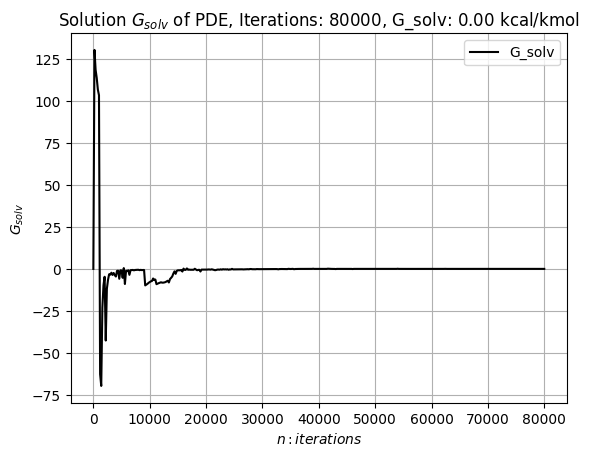

In [7]:
Post.plot_G_solv_history()

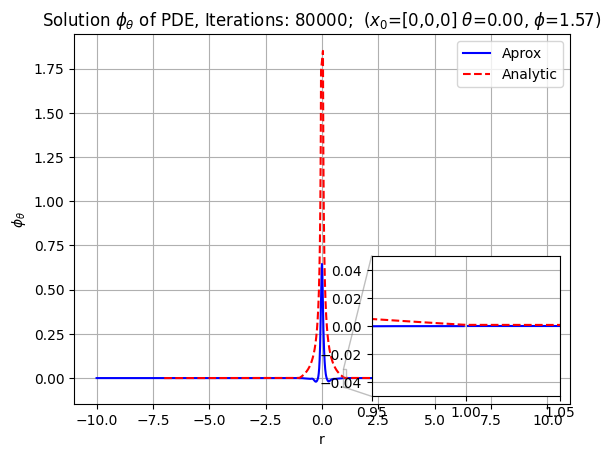

In [8]:
Post.plot_aprox_analytic(N=8000,zoom=True, lims_zoom=[[0.95,1.05],None])

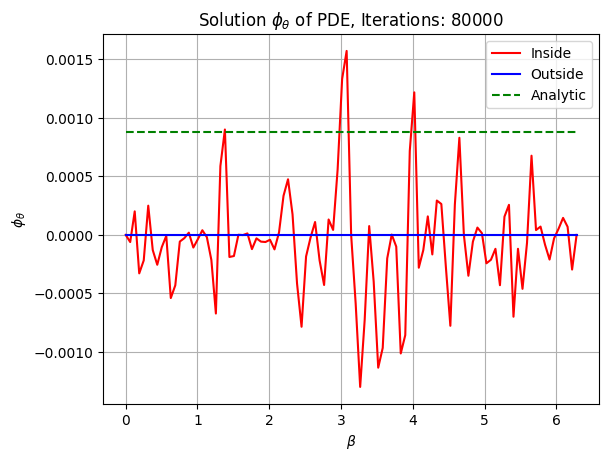

In [15]:
Post.plot_line_interface()

In [14]:
Post.plot_mesh_3D()
Post.plot_interface_3D('phi')
Post.plot_interface_3D('dphi')

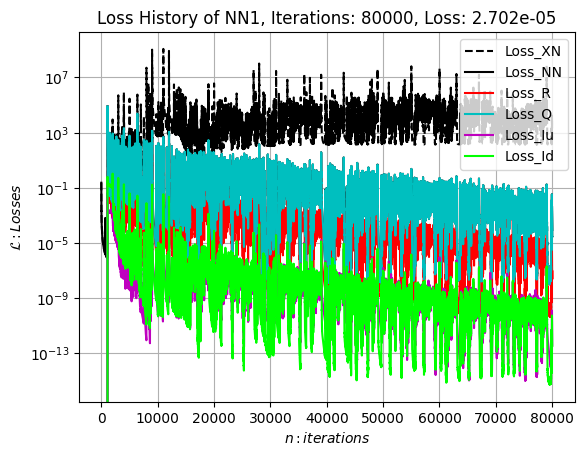

In [9]:
Post.plot_loss_history(domain=1)

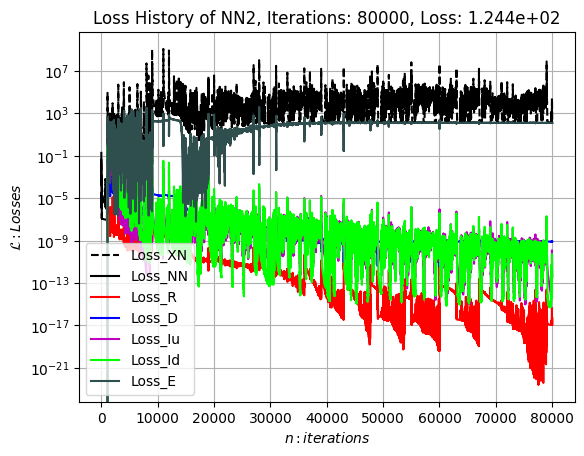

In [10]:
Post.plot_loss_history(domain=2)

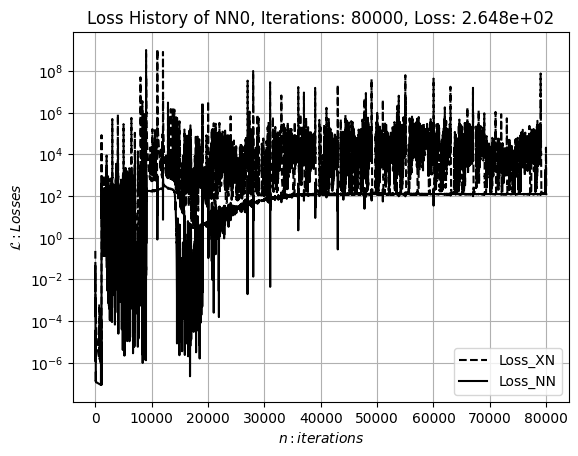

In [11]:
Post.plot_loss_history(domain=0, plot_w=True)

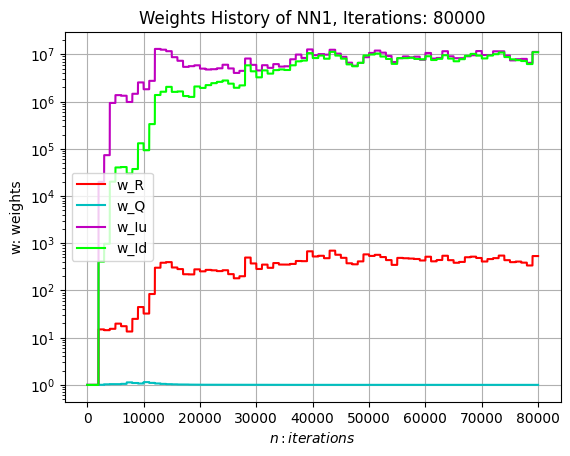

In [12]:
Post.plot_weights_history(domain=1)

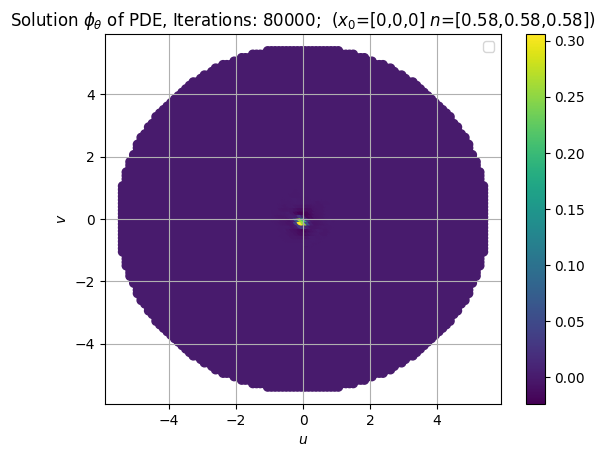

In [13]:
Post.plot_phi_contour(n=np.array([1,1,1]))

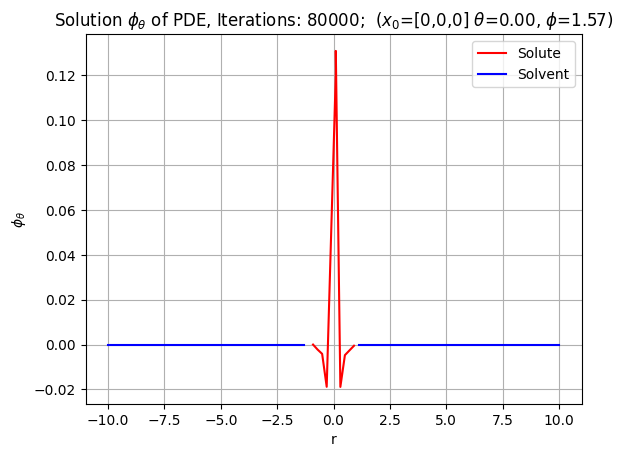

In [14]:
Post.plot_phi_line()